In [ ]:
!python -m pip install -U pip
!python -m pip install -U matplotlib
!python -m pip install -U numpy
!python -m pip install -U pandas

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
import sys

In [24]:
input_dir="/scratch4/mschatz1/aostrov4/retraining_project/genome-deduplication/test_dedups/multiple_inputs_confirmation"
source_kmer_counts = os.path.join(input_dir, "source_fasta_kmer_counts.txt")
deduped_kmer_counts = os.path.join(input_dir, "deduped_kmer_counts.txt")
ignored_kmer_counts = os.path.join(input_dir, "ignored_kmer_counts.txt")
ignored_and_deduped = os.path.join(input_dir, "ignored_deduped_kmer_counts.txt")
masked_kmer_counts = os.path.join(input_dir, "masked_kmer_counts.txt")
combined_counts = os.path.join(input_dir, "combined_all_kmers.txt")

In [25]:
def read_kmer_counts(file_path):
    try:
        kmer_dict={}
        with open(file_path, 'r') as f:
            for line in f:
                parts=line.strip().split('\t')
                kmer=parts[0]
                count=int(parts[1])
                kmer_dict[kmer]=count
        return kmer_dict
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        sys.exit(1)

In [26]:
test=read_kmer_counts(source_kmer_counts)

In [ ]:
def plot_kmer_distributions_grouped(kmer_dicts, labels, colors):
    """Plot multiple k-mer distributions as grouped bar chart"""
    # Get max count across all datasets
    max_count = max(max(d.values()) for d in kmer_dicts)
    
    # Create bins for grouping (adjust bin size as needed)
    bin_size = 1
    bins = np.arange(1, max_count + bin_size + 1, bin_size)
    
    # For each dataset, count how many kmers fall in each bin
    all_histograms = []
    for kmer_dict in kmer_dicts:
        counts = list(kmer_dict.values())
        hist, _ = np.histogram(counts, bins=bins)
        all_histograms.append(hist)
    
    # Set up the bar positions
    num_bins = len(bins) - 1
    num_datasets = len(kmer_dicts)
    bar_width = 0.8 / num_datasets
    
    # Create the grouped bars
    x = np.arange(num_bins)
    for i, (hist, label, color) in enumerate(zip(all_histograms, labels, colors)):
        offset = (i - num_datasets/2) * bar_width + bar_width/2
        plt.bar(x + offset, hist, bar_width, label=label, color=color, alpha=0.7)
    
    plt.yscale('log')
    plt.xlabel('K-mer Count')   
    plt.ylabel('Frequency')
    # Set x-axis ticks to show actual k-mer count values (starting from 1)
    step = max(1, num_bins//20)
    tick_positions = x[::step]
    # bins[:-1] gives the left edge of each bin (which corresponds to x positions)
    tick_labels = bins[:-1][::step].astype(int)
    # Ensure matching lengths
    min_len = min(len(tick_positions), len(tick_labels))
    plt.xticks(tick_positions[:min_len], tick_labels[:min_len])
    plt.legend()

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (8).

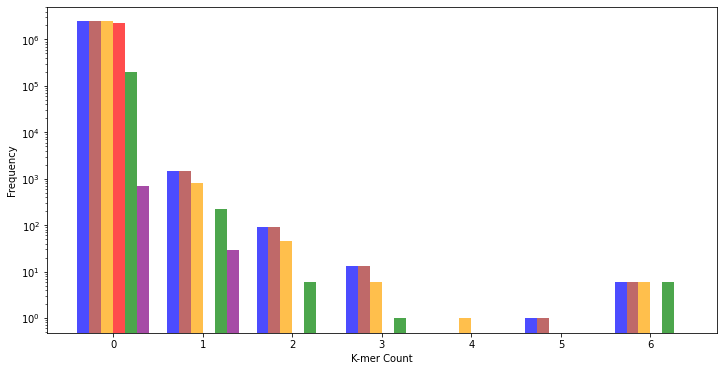

In [39]:
# Create a single figure with all distributions
plt.figure(figsize=(12, 6))

# Read all k-mer count files
source_kmers = read_kmer_counts(source_kmer_counts)
deduped_kmers = read_kmer_counts(deduped_kmer_counts)
ignored_kmers = read_kmer_counts(ignored_kmer_counts)
ignored_and_deduped_kmers = read_kmer_counts(ignored_and_deduped)
masked_kmers = read_kmer_counts(masked_kmer_counts)
combined_kmers = read_kmer_counts(combined_counts)

# Plot as grouped histogram with custom order
kmer_dicts = [source_kmers, combined_kmers, ignored_and_deduped_kmers, deduped_kmers, ignored_kmers, masked_kmers]
labels = ["Source", "Combined", "Ignored+Deduped", "Deduped", "Ignored", "Masked"]
colors = ['blue', 'brown', 'orange', 'red', 'green', 'purple']

plot_kmer_distributions_grouped(kmer_dicts, labels, colors)

plt.title('K-mer Count Distributions (Grouped)')
plt.tight_layout()
plt.show()